Zomato Dataset Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install seaborn

In [5]:
import seaborn as sns

In [7]:
data = pd.read_csv('/content/sample_data/zomato.csv', engine='python', on_bad_lines='warn',encoding='latin1')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Checking for missing or null values:

In [9]:
data.shape

(9551, 21)

In [7]:
data.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [8]:
[features for features in data.columns if data[features].isnull().sum()>1]

['Cuisines']

In [8]:
df_country = pd.read_excel('/content/sample_data/Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [9]:
final_df = pd.merge(data,df_country,on='Country Code',how='left')

In [15]:
final_df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [16]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [41]:
country_names = final_df.Country.value_counts().index

In [42]:
print(country_names)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')


In [67]:
country_val = final_df.Country.value_counts().values

In [43]:
print(country_val)

[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


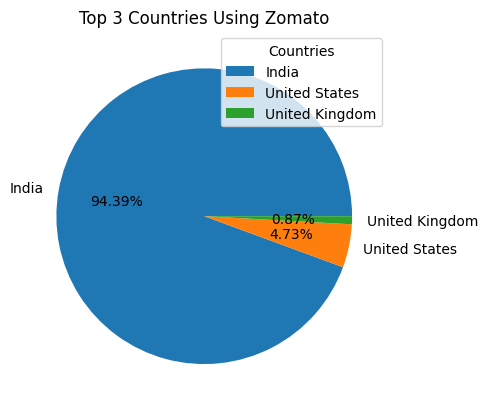

In [32]:
##pie chart - Top 3 countries
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%',)
plt.legend(title="Countries")
plt.title("Top 3 Countries Using Zomato")
plt.show()

Observation: Zomato's maximum records or transaction are from India,second being USA and third being the UK

In [44]:
#Numerical Variables
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [45]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


##Observation
1. Rating between 4.5 to 4.9 ->Excellent
2. Rating between 4.0 to 4.4 ->Very Good
3. Rating between 3.5 to 3.9 -> Good
4. Rating between 2.5 to 3.4 -> Average
5. Rating between 1.8 to 2.4 -> Poor
6. About 2800 people haven't rated the service yet.

In [68]:
ratings['Rating color'].value_counts().index

Index(['Orange', 'Red', 'Green', 'Yellow', 'Dark Green', 'White'], dtype='object', name='Rating color')

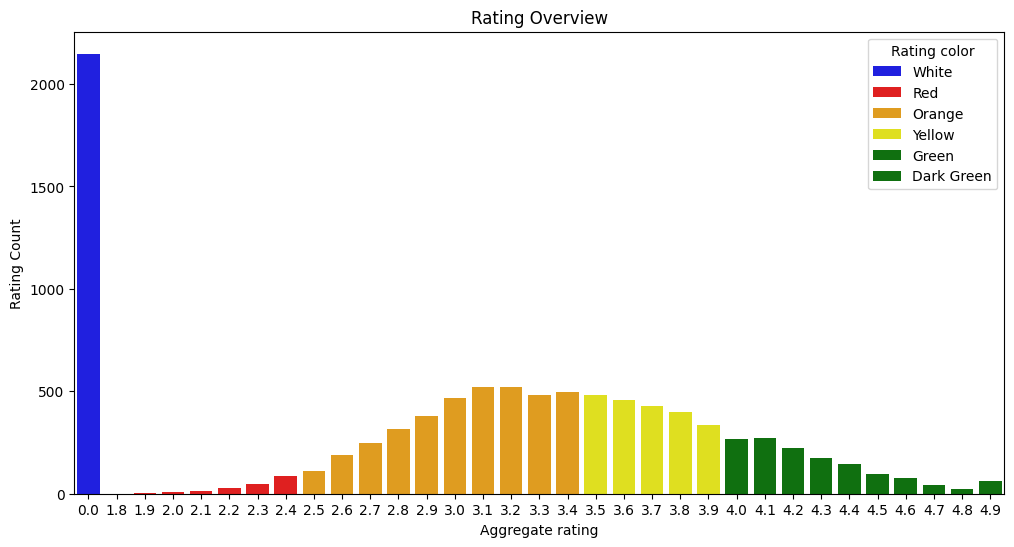

In [72]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x= 'Aggregate rating',y='Rating Count',hue='Rating color',data=ratings,palette=['Blue','Red','Orange','Yellow','Green','Green'])
plt.title("Rating Overview")
plt.show()

##Observation
1. Count of ppl who have not rated is high.
2. Maximum number of ratings are between 2.5 to 3.4

Text(0.5, 1.0, 'Frequency of Rate Counts')

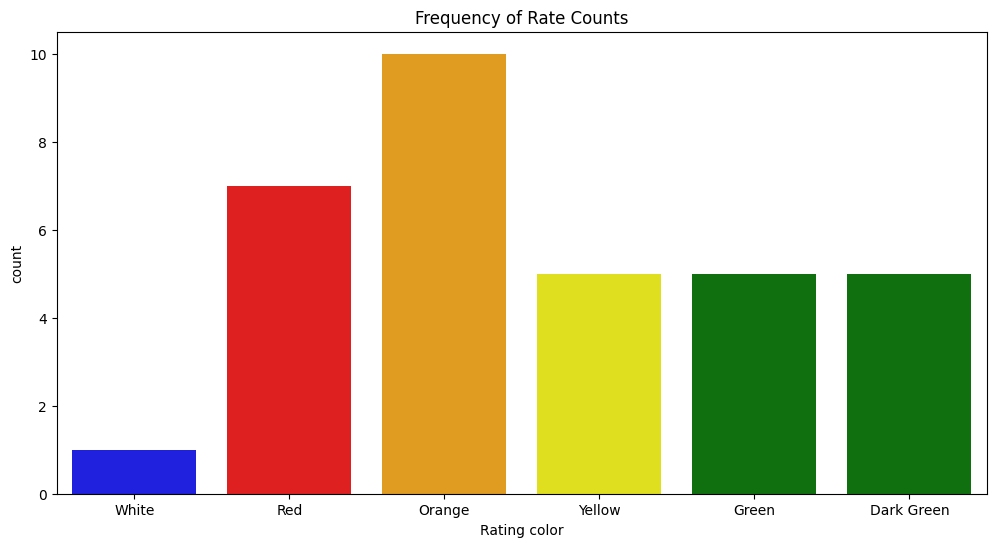

In [79]:
##Count plot
sns.countplot(x="Rating color",data=ratings,hue='Rating color',palette=['Blue','Red','Orange','Yellow','Green','Green'])
plt.title("Frequency of Rate Counts")


In [94]:
##Countries who have given 0 ratings
final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [95]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


##Observation
Maximum number of 0 ratings are from Indian Customers

In [99]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [101]:
##Countries and Their Currency Used
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [104]:
##Countries which have online delivery option - YES
final_df[final_df['Has Online delivery']=='Yes'].groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,India,Yes,2423
1,UAE,Yes,28


##Observations
Online deliveries are available in India and UAE.

In [107]:
city_values = final_df.City.value_counts().values
city_labels = final_df.City.value_counts().index

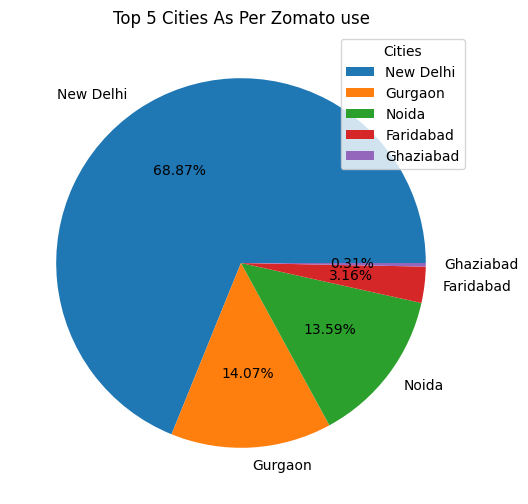

In [112]:
##Pie Chart - for cities distribution
plt.pie(city_values[:5],labels = city_labels[:5],autopct='%1.2f%%')
plt.title("Top 5 Cities As Per Zomato use")
plt.legend(title="Cities")
plt.show()

In [116]:
##Top 10 Cuisines
final_df['Cuisines'].value_counts().head(10)

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170


In [118]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [11]:
from itertools import combinations
from collections import Counter

final_df['Cuisines'] = final_df['Cuisines'].fillna('Unknown')
df_cuisine = final_df.assign(cuisine_list=final_df['Cuisines'].str.split(', ')).explode('cuisine_list')
top_10_cuisines = final_df['Cuisines'].value_counts().head(10)
print("Top 10 Cuisines:\n",top_10_cuisines)

def get_pairings(cuisine_str):
  items=sorted([c.strip() for c in cuisine_str.split(',')])
  return list(combinations(items,2)) if len(items) >= 2 else []
all_pairs = []
final_df['Cuisines'].apply(lambda x: all_pairs.extend(get_pairings(x)))
pairing_counts = Counter(all_pairs).most_common(10)

print("\nTop 5 Cuisine Pairings:")
for pair, count in pairing_counts[:5]:
    print(f"{pair}: {count} restaurants")

Top 10 Cuisines:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Top 5 Cuisine Pairings:
('Chinese', 'North Indian'): 1784 restaurants
('Mughlai', 'North Indian'): 832 restaurants
('Fast Food', 'North Indian'): 485 restaurants
('Continental', 'North Indian'): 468 restaurants
('Chinese', 'Fast Food'): 466 restaurants


/tmp/ipython-input-943133428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette='viridis')


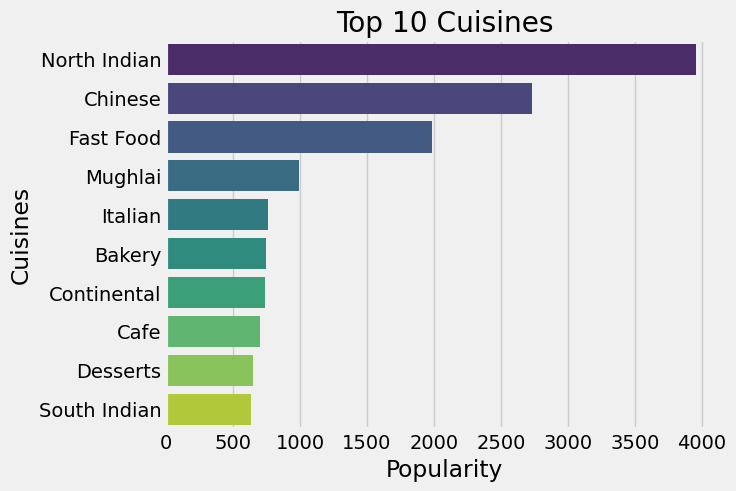

In [24]:
sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette='viridis')
plt.title("Top 10 Cuisines")
plt.ylabel("Cuisines")
plt.xlabel("Popularity")
plt.show()

##Observation
1. Market Dominance: North Indian cuisine is the most prevalent, appearing in nearly 4,000 restaurants, followed by Chinese and Fast Food.
---
2. The most common "Cuisine Pairing" is North Indian & Chinese. This indicates that mid-range restaurants in the primary region (India) tend to offer a "multi-cuisine" menu to appeal to a broader customer base.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


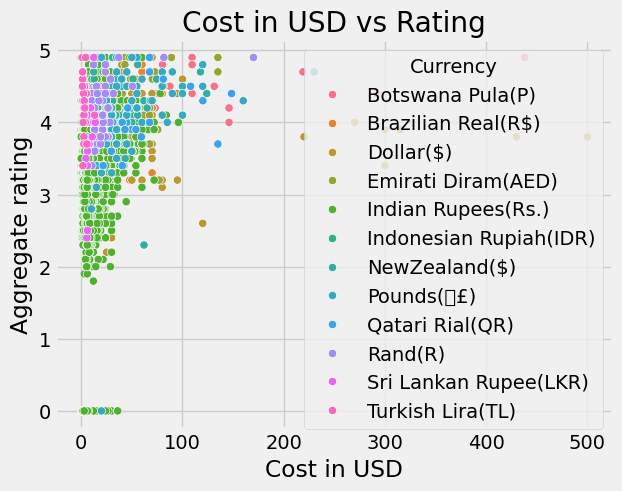

In [26]:
exchange_map = {
    'Botswana Pula(P)': 0.073, 'Brazilian Real(R$)': 0.20, 'Dollar($)': 1.0,
    'Emirati Diram(AED)': 0.27, 'Indian Rupees(Rs.)': 0.012, 'Indonesian Rupiah(IDR)': 0.000064,
    'NewZealand($)': 0.62, 'Pounds(ÅŒÂ£)': 1.27, 'Qatari Rial(QR)': 0.27,
    'Rand(R)': 0.053, 'Sri Lankan Rupee(LKR)': 0.0031, 'Turkish Lira(TL)': 0.033
}

final_df['Cost_USD'] = final_df.apply(lambda row: row['Average Cost for two'] * exchange_map.get(row['Currency'], 1), axis=1)

# Cost Vs Rating
sns.scatterplot(x='Cost_USD', y='Aggregate rating', data=final_df,hue='Currency')
plt.title('Cost in USD vs Rating')
plt.xlabel("Cost in USD")
plt.show()

##Observation
1. By standardizing the Average Cost for two into USD, we can compare affordability across 15 countries.


---


2. Higher-priced restaurants often provide a perceived or actual increase in quality/service.

In [13]:
from scipy.stats import ttest_ind
# 1. Investigate Zero Ratings
zero_rating_df = final_df[final_df['Aggregate rating'] == 0]
print("Insights✨\n")
print(f"Percentage of Zero-Rated restaurants with No Delivery: { (zero_rating_df['Has Online delivery'] == 'No').mean() * 100:.2f}%")

# 2. Hypothesis Testing: Does Online Delivery impact ratings?
rated_only = final_df[final_df['Aggregate rating'] > 0]
delivery_yes = rated_only[rated_only['Has Online delivery'] == 'Yes']['Aggregate rating']
delivery_no = rated_only[rated_only['Has Online delivery'] == 'No']['Aggregate rating']

#Two sample independent t-test
t_stat, p_val = ttest_ind(delivery_yes, delivery_no)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.10f}")

if p_val < 0.05:
    print("Conclusion: Online Delivery has a statistically significant impact on ratings.")

Insights✨

Percentage of Zero-Rated restaurants with No Delivery: 95.53%
T-statistic: -6.2687, P-value: 0.0000000004
Conclusion: Online Delivery has a statistically significant impact on ratings.


##Observation
1. Having an "Online Delivery" feature has a **statistically significant** positive impact on the aggregate rating of a restaurant.
---
2. Restaurants offering delivery tend to be more "active" and receive more consistent feedback.
---
3. There are about **95.53%** of zero-Rated restaurants with No Delivery

/tmp/ipython-input-3212467763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_counts.index, y=delivery_counts.values, palette='viridis')


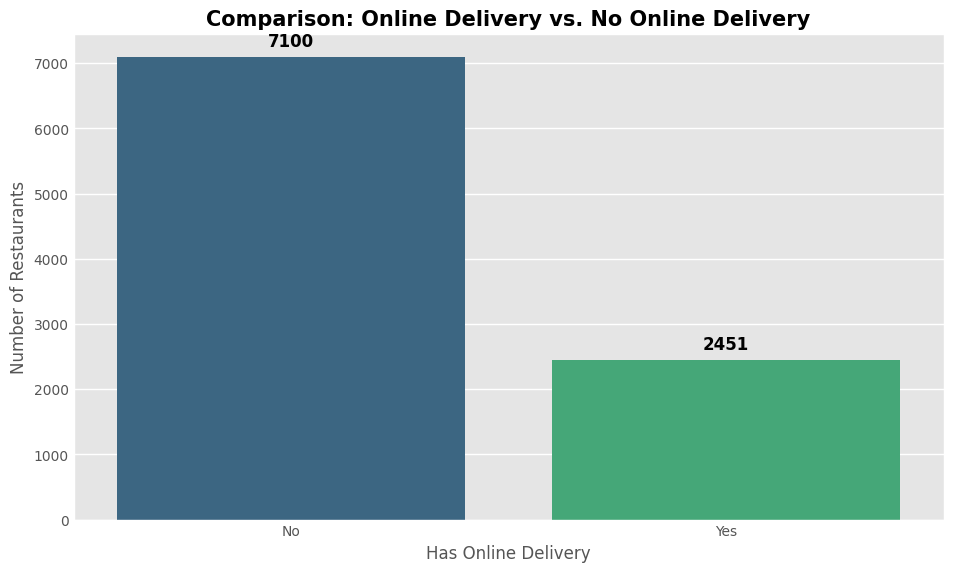

In [30]:
##Bar Chart - Online Delivery or No?
delivery_counts = final_df['Has Online delivery'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=delivery_counts.index, y=delivery_counts.values, palette='viridis')

plt.title('Comparison: Online Delivery vs. No Online Delivery', fontsize=15, fontweight='bold')
plt.xlabel('Has Online Delivery', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)

for i, count in enumerate(delivery_counts.values):
    plt.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

/tmp/ipython-input-674151286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=rated_only,palette="Set2")


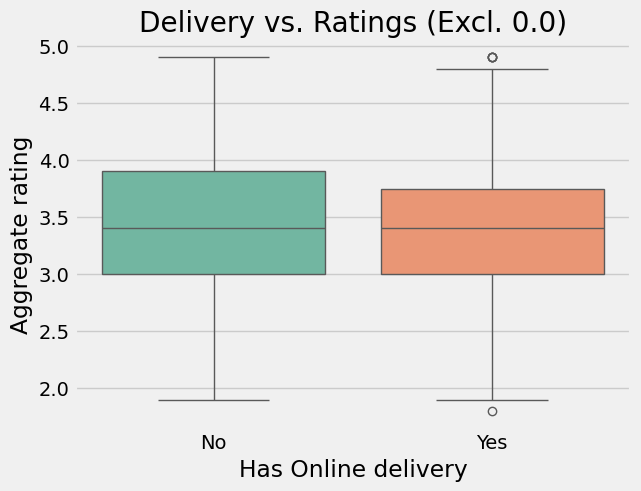

In [22]:
rated_only = final_df[final_df['Aggregate rating'] > 0]
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=rated_only,palette="Set2")
plt.title('Delivery vs. Ratings (Excl. 0.0)')
plt.show()

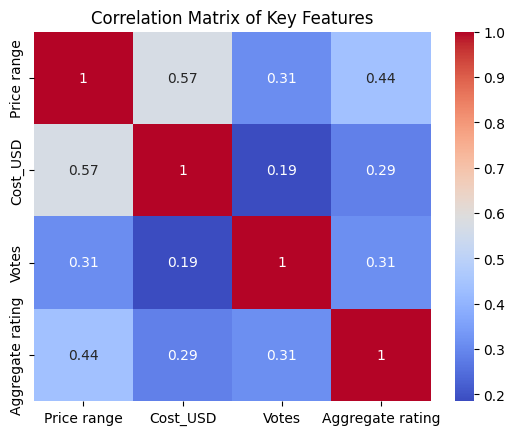

In [16]:
corr_data = final_df[['Price range', 'Cost_USD', 'Votes', 'Aggregate rating']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Features')
plt.show()

##Observation
1. It shows that as the price range increases, the rating tends to increase as well. (Price VS. Rating)
---
2. There is a positive link between the number of people who vote and the final rating, meaning popular restaurants (higher volume of reviews) generally maintain higher scores. (Votes Vs. Rating)

##Analytical Sumary✨

/tmp/ipython-input-1140237621.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='magma', ax=axes[3, 0])
/tmp/ipython-input-1140237621.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=rated_only, palette='Set2', ax=axes[3, 1])


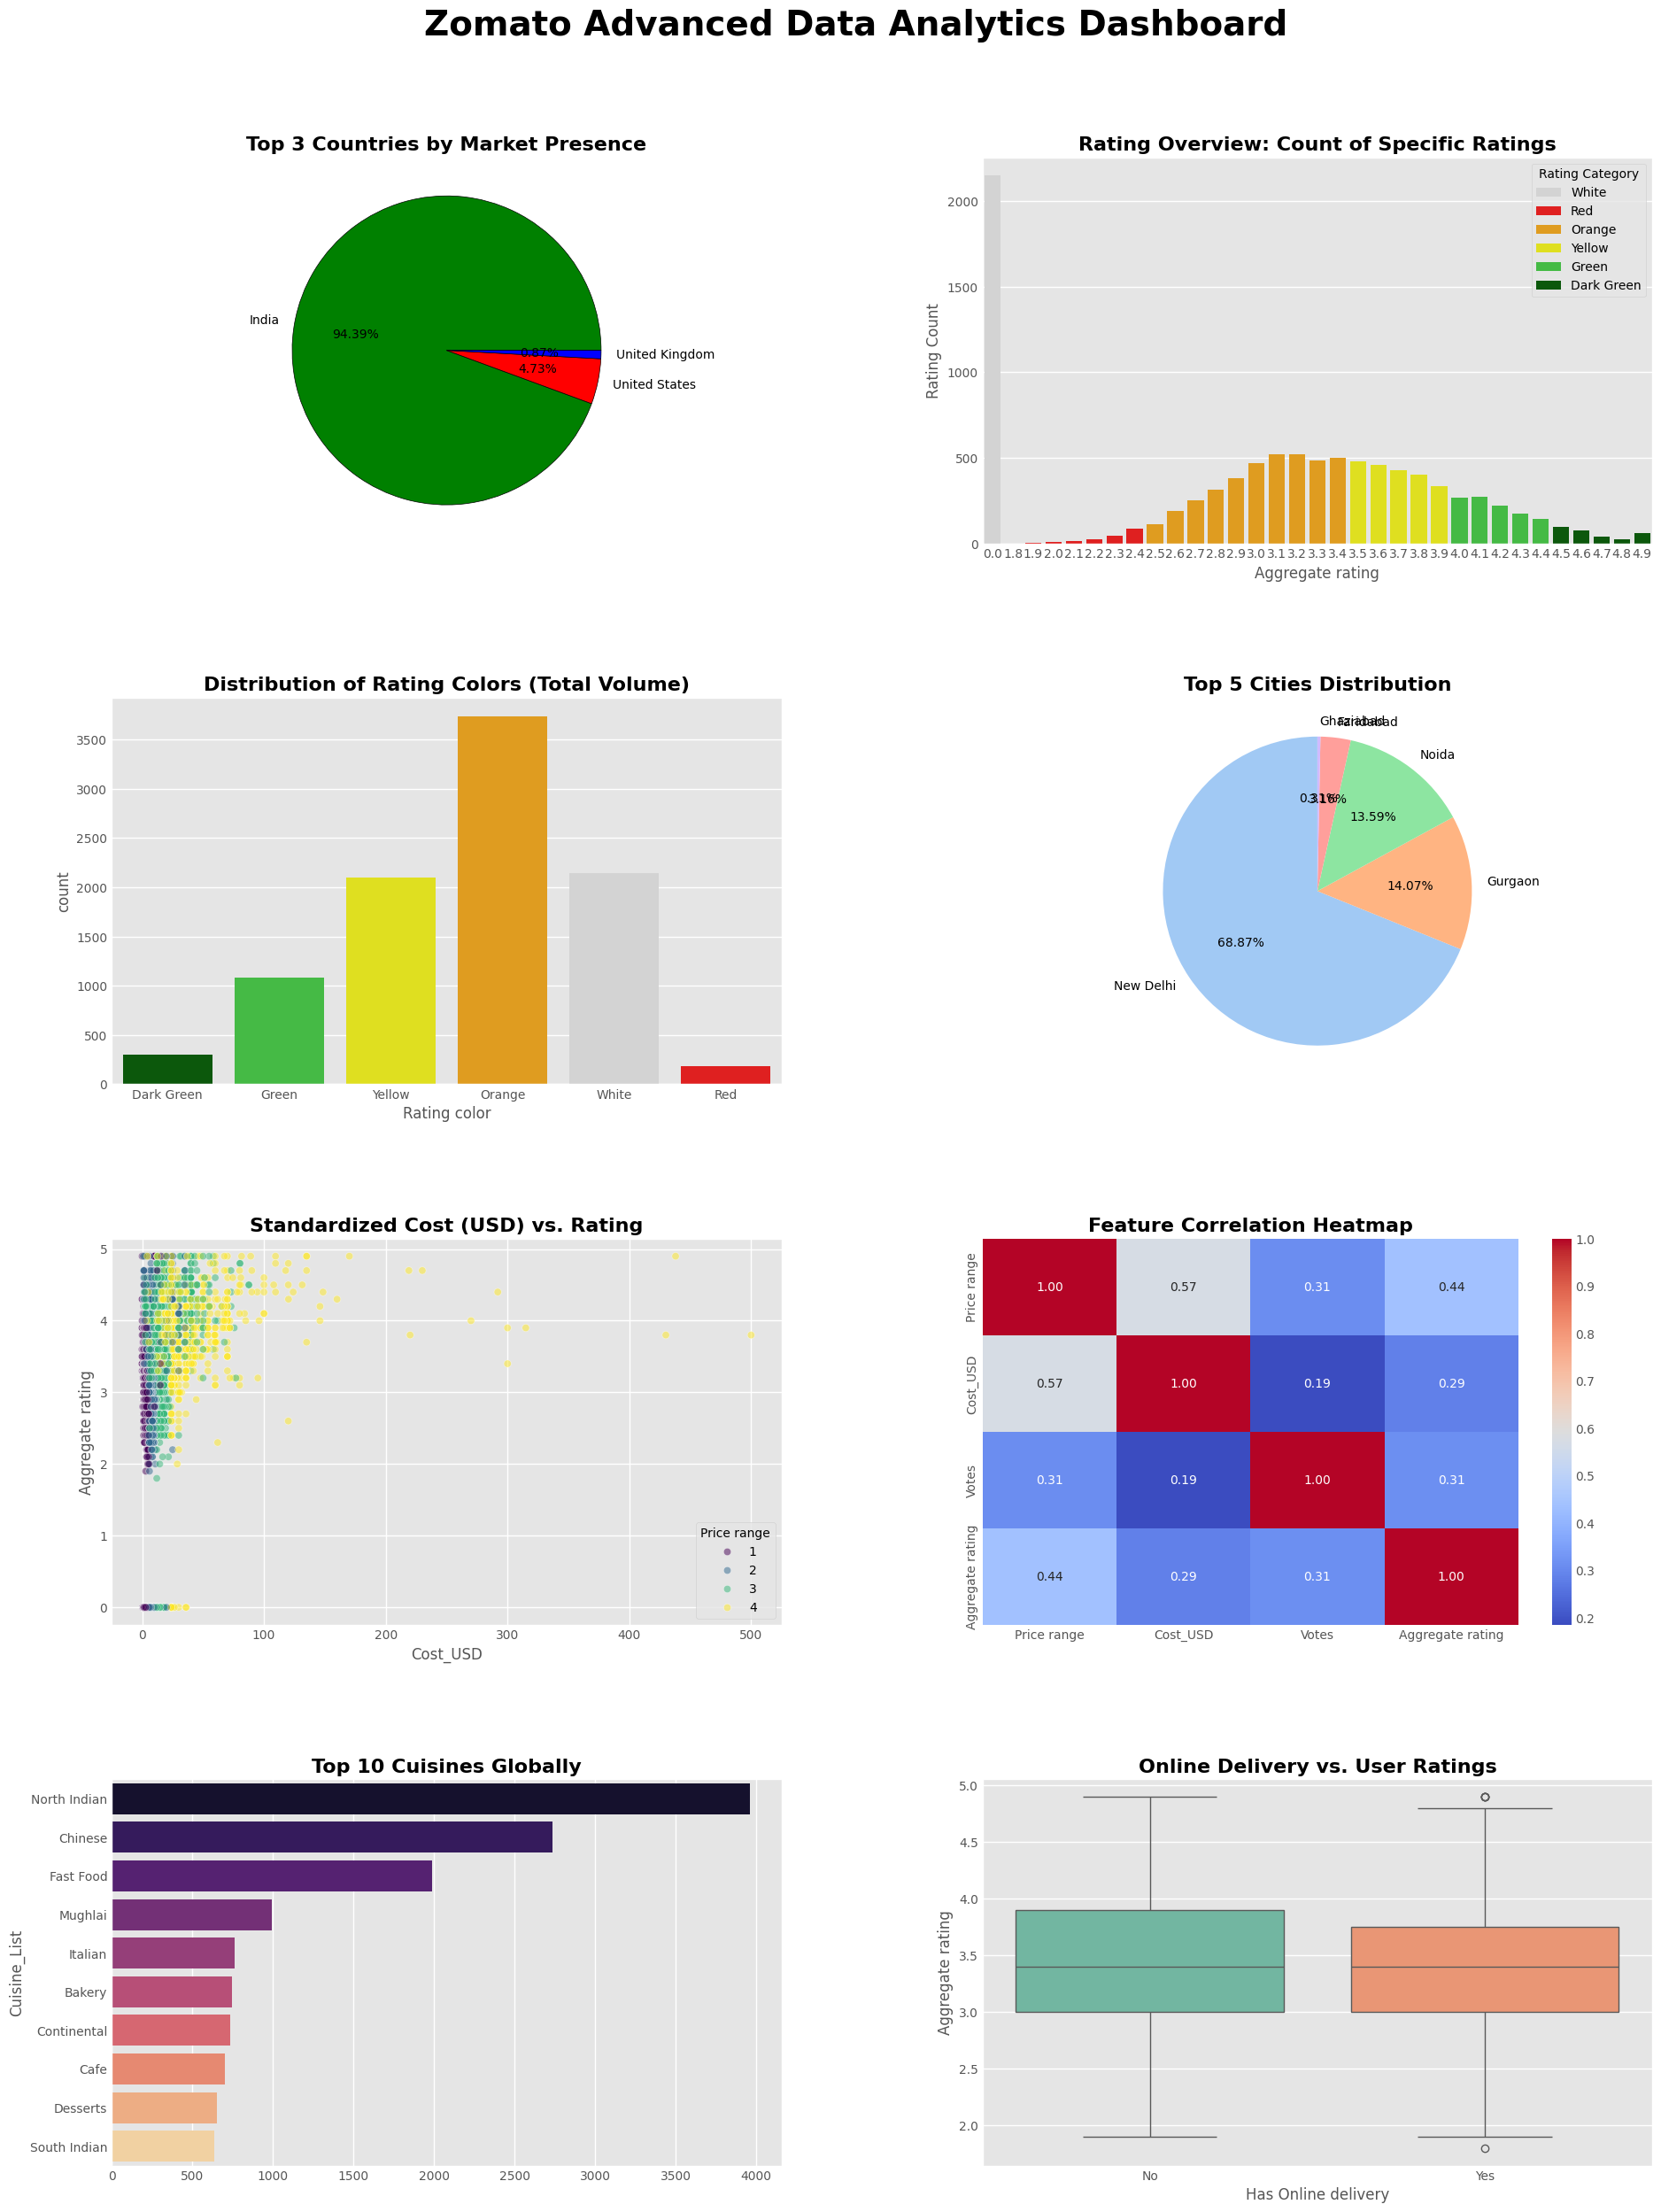

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

exchange_map = {
    'Botswana Pula(P)': 0.073, 'Brazilian Real(R$)': 0.20, 'Dollar($)': 1.0,
    'Emirati Diram(AED)': 0.27, 'Indian Rupees(Rs.)': 0.012, 'Indonesian Rupiah(IDR)': 0.000064,
    'NewZealand($)': 0.62, 'Pounds(ÅŒÂ£)': 1.27, 'Qatari Rial(QR)': 0.27,
    'Rand(R)': 0.053, 'Sri Lankan Rupee(LKR)': 0.0031, 'Turkish Lira(TL)': 0.033
}
final_df['Cost_USD'] = final_df.apply(lambda row: row['Average Cost for two'] * exchange_map.get(row['Currency'], 1), axis=1)

ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0: 'Rating Count'})

country_names = final_df.Country.value_counts().index
country_val = final_df.Country.value_counts().values
city_labels = final_df.City.value_counts().index
city_values = final_df.City.value_counts().values

plt.style.use('ggplot')
fig, axes = plt.subplots(4, 2, figsize=(20, 28))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot 1: Top 3 Countries
axes[0, 0].pie(country_val[:3], labels=country_names[:3], autopct='%1.2f%%',colors=['green','red','blue'],wedgeprops={'edgecolor':'black'})
axes[0, 0].set_title("Top 3 Countries by Market Presence", fontsize=16, weight='bold')

# Plot 2: Rating Overview
palette_map = {'White': 'lightgrey', 'Red': 'red', 'Orange': 'orange', 'Yellow': 'yellow', 'Green': 'limegreen', 'Dark Green': 'darkgreen'}
sns.barplot(x='Aggregate rating', y='Rating Count', hue='Rating color', data=ratings, palette=palette_map, ax=axes[0, 1], dodge=False)
axes[0, 1].set_title("Rating Overview: Count of Specific Ratings", fontsize=16, weight='bold')
axes[0, 1].legend(title="Rating Category", bbox_to_anchor=(1, 1))

# Plot 3: Frequency of Rating Colors
sns.countplot(x="Rating color", data=final_df, hue='Rating color', palette=palette_map, ax=axes[1, 0], dodge=False, legend=False)
axes[1, 0].set_title("Distribution of Rating Colors (Total Volume)", fontsize=16, weight='bold')

# Plot 4: Top 5 Cities
axes[1, 1].pie(city_values[:5], labels=city_labels[:5], autopct='%1.2f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1, 1].set_title("Top 5 Cities Distribution", fontsize=16, weight='bold')

# Plot 5: Cost vs Rating (Scatter)
sns.scatterplot(x='Cost_USD', y='Aggregate rating', data=final_df, hue='Price range', palette='viridis', ax=axes[2, 0], alpha=0.5)
axes[2, 0].set_title("Standardized Cost (USD) vs. Rating", fontsize=16, weight='bold')

# Plot 6: Correlation Heatmap
corr_cols = ['Price range', 'Cost_USD', 'Votes', 'Aggregate rating']
sns.heatmap(final_df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2, 1])
axes[2, 1].set_title("Feature Correlation Heatmap", fontsize=16, weight='bold')

# Plot 7: Top 10 Cuisines (Exploded Data)
df_cuisine = final_df.assign(Cuisine_List=final_df['Cuisines'].str.split(', ')).explode('Cuisine_List')
top_10 = df_cuisine['Cuisine_List'].value_counts().head(10)
sns.barplot(x=top_10.values, y=top_10.index, palette='magma', ax=axes[3, 0])
axes[3, 0].set_title("Top 10 Cuisines Globally", fontsize=16, weight='bold')

# Plot 8: Delivery Impact (Boxplot)
rated_only = final_df[final_df['Aggregate rating'] > 0]
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=rated_only, palette='Set2', ax=axes[3, 1])
axes[3, 1].set_title("Online Delivery vs. User Ratings", fontsize=16, weight='bold')

# Main Title
plt.suptitle("Zomato Advanced Data Analytics Dashboard", fontsize=28, weight='bold', y=0.94)

# Show and Save
plt.savefig('Zomato_Final_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()